# Differential expression and geneset analysis of mouse circadian cycle data in python
##### Sumeed Manzoor<br>University of Michigan Medical School

This is an interesting dataset that has not yet been published. It's a cool opportunity to analyze a dataset yourself and see what you find!

The topic of circadian rhythms has been long studied. Currently, we know a good amount about some of the genes involved, called the 'circadian clock.' This includes the genes PER, CRY, and BMAL, which work together in a transcription-translation feedback loop (TTFL) to keep our body's clock in sync with the light our body's are exposed to during the day (and lack of light during the night). We also have a central clock, in the central nervous system, and a peripheral clock, the rest of the body. The central clock is like a master clock that keeps the peripheral clocks in sync/on time. You can think of it like a conductor telling the rest of the body when to be in 'daytime' or 'awake' mode and when to be in 'nighttime' or 'rest' mode.

We also know that the microbes in our body respond to the circadian cycle as well. Certain microbes are more dominant at certain times of the day. Part of this might be our body signaling the microbes, part of it might be the microbes signaling our body.

When we think about our daytime activities, they including eating and being active. Our entire body is moving, thinking, seeing, interacting with the outside world. At night, we are generally not as active and not eating as much. We spend a lot less energy interactive with the environment and more energy on rest and recovery. Our brains are not perceiving and interpreting signals from the outside world, rather it is imagining and dreaming of concepts of its own.

Mice are quite similar to us, except for them their 'daytime activities' are at night since they are nocturnal.

What would happen if we changed the length of the day, such that there is more time with light or more time with darkness? Or what if it was dark all the time? What if we tried to eliminate microbes? How would the different tissues of our body respond?

That's what this dataset is interrogating.

From Surah Naba:

> وَجَعَلْنَا نَوْمَكُمْ سُبَاتًۭا ٩\
> وَجَعَلْنَا ٱلَّيْلَ لِبَاسًۭا ١٠\
> وَجَعَلْنَا ٱلنَّهَارَ مَعَاشًۭا ١١

> And We have made you sleep for rest\
> And made the night as a cover\
> And made the day for livelihood

In [1]:
import numpy as np
import pandas as pd

| GEO Accession      | [Series GSE226855](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE226855)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|--------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|                    |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Status             | Public on Mar 10, 2023                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| Title              | Comparative transcriptome data of multi tissues in response to different environmental light-dark cycles                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Organism           | [Mus musculus](https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?mode=Info&id=10090)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Experiment type    | Expression profiling by high throughput sequencing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| Summary            | It is well known that host-microbes and  immunity interactions are influenced by dietary patterns, as well as  daily environmental light-dark (LD) cycles that entrain circadian  rhythms in the host. Emerging data has highlighted the importance of  diet patterns and timing on the interaction among circadian rhythms, gut  microbiome, and immunity, however, their impacts on LD cycles are less  reported. Therefore, we aim to study how LD cycles regulate the  homeostatic crosstalk between gut microbiome, hypothalamic and hepatic  circadian clock oscillations and immunity. We hypothesized that  different environmental LD cycles: (1) constant darkness, LD0/24; (2)  short light, LD8/16; (3) normal LD cycle, LD12/12; (4) long light,  LD16/8; and (5) constant light, LD24/0, may affect immunity and  metabolism to varying degrees. Therefore, 240 mice were managed with  chow diets (CD) and antibiotics treatments (ABX) under five different LD  cycles for 42 days. The liver (LIV), hypothalamus (HYP), inguinal white  adipose tissue (iWAT),  ileum epithelium (ILE), colon epithelium (COL),  jejunum epithelium (JEJ), cecum epithelium (CEC),  spleen (SPL),  mammary gland (MAG), and thymus gland (THY) tissues were obtained for  studying their impacts immunity using RNA-Seq data.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|                    |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Overall design     | Firstly, two hundreds and forty  10-week-old C57BL/6N murine line were selected and supplied, all mice  were initially maintained under the same standard laboratory conditions  to harmonize the environment and diets. The initial body weight of each  mouse was 19-20 g. After acclimatization for 7 days, the mice were then  randomly divided into following two parts: chow diets parts (CD, n =  120), and antibiotics treatment parts (ABX, n = 120). Adequate  sterilized drinking water and pelleted feed (irradiation by Co60) were  provided for CD mice, and the diets were consisted of corn, soybean,  wheat, chicken and fish meal, vegetable oil, and a variety of customized  vitamins and trace elements. Mice from ABX parts received same  sterilized feed but added a cocktail of broad-spectrum antibiotics in  their drinking water.Then, all 240 mice from CD and ABX parts were  randomly divided into 10 groups to receive following 5 light-dark cycles  : (1) 0 h light/24 h dark fed with CD (CD_LD0/24, n = 24); (2) 8 h  light/16 h dark fed with CD (CD_LD8/16, n = 24); (3) 12 h light/12 h  dark fed with CD (CD_LD12/12, n = 24); (4) 16 h light/8 h dark fed with  CD (CD_LD16/8, n = 24); (5) 24 h light/0 h dark fed with CD (CD_LD24/0, n  = 24); (6) 0 h light/24 h dark fed with ABX (ABX_LD0/24, n = 24); (7) 8  h light/16 h dark fed with ABX (ABX_LD8/16, n = 24); (8) 12 h light/12 h  dark fed with ABX (ABX_LD12/12, n = 24); (9) 16 h light/8 h dark fed  with ABX (ABX_LD16/8, n = 24); and (10) 24 h light/0 h dark fed with ABX  (ABX_LD24/0, n = 24). Each mouse was maintained in a single cage in an  environmentally controlled warehouse that allowed for manipulating  light-dark cycles according to regulations, and light-dark cycles were  controlled with an LED light strip of 150 to 200 lx and a temperature of  4500 to 5000 K, with the lights being turned off for 24 h of LD0/24;  the lights being turned on at CT6 (defined as ZT0) and turned off at ZT8  of LD8/16; the light being turned on at ZT0 and turned off at ZT12 of  LD12/12; the light being turned on at ZT0 and turned off at ZT16 of  LD16/8; and the lights being turned on for 24 h of LD24/0. The trough,  drinking fountain, and litter were changed every day after the lights  were turned on at ZT0. Temperature within the warehouse was 22-24 °C,  relative humidity was 55-65%, and negative pressure ventilation was  used. The experimental lasted for 42 days and was under strict  environmental control conditions. |
|                    |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Contributor(s)     | [Zhen Y](https://www.ncbi.nlm.nih.gov/pubmed/?term=Zhen%20Y[Author])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| Citation missing   |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|                    |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Submission date    | Mar 07, 2023                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Last update date   | Mar 10, 2023                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Contact name       | Yongkang Zhen                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| E-mail(s)          | dx120220164@stu.yzu.edu.cn                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Phone              | 15062800765                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Organization name  | Yangzhou University                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Street address     | Yangzhou University                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| City               | Yangzhou                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| State/province     | — Please Select —                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| ZIP/Postal code    | 225009                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| Country            | China                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|                    |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| BioProject         | [PRJNA941888](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA941888)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|                    |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| featureCounts file | [GSE226855_RNA_Seq_processed_data.xlsx](https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE226855&format=file&file=GSE226855%5FRNA%5FSeq%5Fprocessed%5Fdata%2Exlsx)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|                    |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Platforms (1)      | GPL28330   DNBSEQ-T7 (Mus musculus)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |

In [2]:
samples = pd.read_csv('GSE226855/sample.csv', sep='\t', names=['GEO','sample'])
samples.head()

,GEO,sample
0,GSM7085663,LIV_CD_LD024_1
1,GSM7085664,LIV_CD_LD024_2
2,GSM7085665,LIV_CD_LD024_3
3,GSM7085666,LIV_CD_LD024_4
4,GSM7085667,LIV_CD_LD024_5


In [3]:
import os
import pickle as pkl

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import seaborn.objects as so

In [5]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
from pydeseq2.preprocessing import deseq2_norm

In [6]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

## DESeq

In [8]:
SAVE = False
if SAVE:
    OUTPUT_PATH = 'GSE226855/output'
    os.makedirs(OUTPUT_PATH, exist_ok=True)

In [9]:
counts_df = pd.read_csv('GSE226855/GSE226855_RNA_Seq_processed_data.csv', index_col=0)

In [140]:
# counts_df.columns = [i.replace('_','z') for i in list(counts_df)]

In [173]:
# counts_df.drop_duplicates(inplace=True)

In [10]:
counts_df = counts_df[~counts_df.index.duplicated(keep='first')] # can't have duplicated genes

In [11]:
counts_df.T

Gene name,Gm24018,Gm35703,D4Ertd617e,E430016F16Rik,Mir3473c,Slc19a1,Gabre,Tex9,Gm34008,Pgbd5,...,Ddx43,Gm46046,Gm36141,Igkv5-40-1,Gm24070,Tmem61,Secisbp2,Gm41849,Olfr536,Gm15831
LIV_CD_LD024_1,0,0,0,0,0,111,5,41,0,0,...,3,10,0,0,0,0,467,0,0,0
LIV_CD_LD024_2,0,0,0,0,0,658,0,9,0,0,...,0,4,0,0,0,0,916,0,0,0
LIV_CD_LD024_3,0,0,0,0,0,521,0,63,0,0,...,4,8,0,0,0,0,1999,0,0,0
LIV_CD_LD024_4,0,0,0,0,0,87,0,118,0,0,...,0,0,0,0,0,0,570,0,0,0
LIV_CD_LD024_5,0,0,0,0,0,534,0,16,0,0,...,0,3,0,0,0,0,1124,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THY_CD_LD168_2,0,0,22,382,3,1077,32,9269,0,0,...,59,46,0,0,0,0,5834,0,0,0
THY_CD_LD168_3,0,0,15,243,3,923,18,7662,0,6,...,57,42,0,0,0,18,4521,0,0,0
THY_CD_LD240_1,0,0,27,250,2,520,27,6257,0,0,...,51,32,0,0,0,0,5301,0,0,0
THY_CD_LD240_2,1,0,28,262,1,862,8,9710,0,6,...,40,54,0,0,0,3,5956,0,0,0


In [12]:
def annotate(x):
    tissue = {'LIV':'liver','HYP':'hypothalamus','iWAT':'inguinal white adipose tissue','ILE':'ileum epithelium','COL':'colon epithelium','JEJ':'jejunum epithelium','CEC':'cecum epithelium','SPL':'spleen','MAG':'mammary gland','THY':'thymus gland'}
    diet = {'CD':'chow diet','ABX':'antibiotic'}
    
    metaTissue = [tissue[j] for j in [i.split('_')[0] for i in x]]
    metaDiet = [diet[j] for j in [i.split('_')[1] for i in x]]
    metaCycle = [i.split('_')[2] for i in x]
    return({'Tissue':metaTissue,'Diet':metaDiet,'Cycle':metaCycle})

In [13]:
metadata = pd.concat([samples, pd.DataFrame(annotate(samples['sample']))], axis=1)

In [14]:
metadata['Gene name'] = metadata['sample']

In [15]:
metadata = metadata.set_index('Gene name')

In [16]:
metadata

,GEO,sample,Tissue,Diet,Cycle
Gene name,,,,,
LIV_CD_LD024_1,GSM7085663,LIV_CD_LD024_1,liver,chow diet,LD024
LIV_CD_LD024_2,GSM7085664,LIV_CD_LD024_2,liver,chow diet,LD024
LIV_CD_LD024_3,GSM7085665,LIV_CD_LD024_3,liver,chow diet,LD024
LIV_CD_LD024_4,GSM7085666,LIV_CD_LD024_4,liver,chow diet,LD024
LIV_CD_LD024_5,GSM7085667,LIV_CD_LD024_5,liver,chow diet,LD024
...,...,...,...,...,...
THY_CD_LD168_2,GSM7085886,THY_CD_LD168_2,thymus gland,chow diet,LD168
THY_CD_LD168_3,GSM7085887,THY_CD_LD168_3,thymus gland,chow diet,LD168
THY_CD_LD240_1,GSM7085888,THY_CD_LD240_1,thymus gland,chow diet,LD240


In [17]:
dds = DeseqDataSet(
    counts=counts_df.T,
    metadata=metadata,
    design_factors="Tissue",  # compare samples based on the "condition"
    # column ("B" vs "A")
    refit_cooks=True,
    n_cpus=8,
)

In [18]:
dds.fit_size_factors()
dds.obsm["size_factors"]

Fitting size factors...
... done in 0.15 seconds.



array([0.59975771, 0.81307379, 1.27522908, 0.34262291, 0.90715202,
       0.99020893, 0.8427129 , 1.18639465, 0.57158214, 0.98146745,
       0.83044028, 1.14594409, 1.02904166, 0.29071497, 1.1462075 ,
       0.94698823, 0.83517017, 1.09815603, 0.85118272, 1.02313943,
       1.12314205, 0.96776918, 1.00669647, 1.15517918, 1.09313902,
       0.84280545, 0.96157016, 1.07763922, 0.36562164, 0.76600732,
       0.8035207 , 1.07206292, 1.05651477, 0.91313605, 0.93366657,
       0.95084417, 0.822926  , 1.0230136 , 0.7674312 , 0.89725627,
       0.92475537, 0.88638425, 0.84183266, 1.01654021, 0.9904763 ,
       1.02055557, 0.98256255, 0.64040601, 1.00437216, 0.94519761,
       1.0770525 , 0.84589467, 0.99126533, 1.05806446, 0.94704228,
       1.50120729, 0.9364767 , 1.06239121, 1.57226081, 0.83550763,
       1.09221994, 0.93709979, 1.17584944, 0.91936958, 1.04896713,
       0.95206633, 0.87901681, 1.24135824, 1.1952188 , 1.60162616,
       1.08030023, 1.03916924, 1.60432332, 1.10932864, 1.07054

In [19]:
dds.fit_genewise_dispersions()
dds.varm["genewise_dispersions"]

Fitting dispersions...
... done in 6.16 seconds.



array([1.00000000e-08,            nan, 2.06622394e+00, ...,
       2.24947151e+02, 2.28000000e+02, 2.28000000e+02])

In [20]:
dds.fit_dispersion_trend()
dds.uns["trend_coeffs"]
dds.varm["fitted_dispersions"]

Fitting dispersion trend curve...
... done in 6.20 seconds.



array([838.15109908,          nan,   5.24135158, ..., 269.3894335 ,
       969.54173307, 441.9639622 ])

In [21]:
dds.fit_dispersion_prior()
print(
    f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
)

logres_prior=0.9732574362179136, sigma_prior=0.9640409115965644


In [22]:
dds.fit_MAP_dispersions()
dds.varm["MAP_dispersions"]
dds.varm["dispersions"]

Fitting MAP dispersions...
... done in 6.90 seconds.



array([186.66501278,          nan,   2.11116547, ..., 228.        ,
       228.        , 228.        ])

In [23]:
dds.fit_LFC()
dds.varm["LFC"]

Fitting LFCs...
... done in 9.81 seconds.



,intercept,Tissue_colon epithelium_vs_cecum epithelium,Tissue_hypothalamus_vs_cecum epithelium,Tissue_ileum epithelium_vs_cecum epithelium,Tissue_inguinal white adipose tissue_vs_cecum epithelium,Tissue_jejunum epithelium_vs_cecum epithelium,Tissue_liver_vs_cecum epithelium,Tissue_mammary gland_vs_cecum epithelium,Tissue_spleen_vs_cecum epithelium,Tissue_thymus gland_vs_cecum epithelium
Gene name,,,,,,,,,,
Gm24018,-1.965196,0.556260,0.845494,0.294654,-0.024993,0.103194,0.369547,2.475339,-0.162465,-0.237783
Gm35703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4Ertd617e,-0.218561,2.701991,3.760600,1.518129,2.343408,1.756337,-0.842703,2.447043,1.274345,2.722389
E430016F16Rik,-0.714005,0.724110,-0.006577,-1.089866,1.885537,-0.411312,-0.881642,1.217448,-1.546989,5.462589
Mir3473c,-1.630257,1.513402,0.113312,1.047560,0.901262,0.705810,0.741173,2.124967,2.463912,1.699315
...,...,...,...,...,...,...,...,...,...,...
Tmem61,1.509818,-1.697368,-1.511627,-0.205709,-2.025530,-0.776298,-3.105466,-1.009180,-0.643109,-0.947531
Secisbp2,7.060217,0.008697,0.050368,0.172932,0.052801,0.395782,0.072220,-0.184235,0.313627,0.689556
Gm41849,-1.319443,-0.089490,1.390509,-0.484422,-0.670737,-0.542551,-0.276204,1.829706,-0.941539,-1.150189


In [24]:
dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()

Refitting 5186 outliers.

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 0.77 seconds.

Fitting LFCs...
... done in 1.48 seconds.

/home/yoyomanzoor/mambaforge/envs/pydeseq2/lib/python3.12/site-packages/pydeseq2/dds.py:1033: ImplicitModificationWarning: Setting element `.varm['_normed_means']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["_normed_means"] = np.zeros(
/home/yoyomanzoor/mambaforge/envs/pydeseq2/lib/python3.12/site-packages/pydeseq2/dds.py:1036: ImplicitModificationWarning: Setting element `.varm['LFC']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["LFC"] = np.zeros(


In [25]:
if SAVE:
    with open(os.path.join(OUTPUT_PATH, "dds_detailed_pipe.pkl"), "wb") as f:
        pkl.dump(dds, f)

## Statistics

In [26]:
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)

In [27]:
stat_res.run_wald_test()
stat_res.p_values

Running Wald tests...
... done in 4.48 seconds.



Gene name
Gm24018          8.933032e-01
Gm35703                   NaN
D4Ertd617e       5.655391e-08
E430016F16Rik    5.509044e-01
Mir3473c         9.358144e-02
                     ...     
Tmem61           8.912931e-02
Secisbp2         9.445437e-01
Gm41849          9.843136e-01
Olfr536          9.031144e-01
Gm15831          9.031146e-01
Length: 46327, dtype: float64

In [28]:
# optional Cooks filtering
if stat_res.cooks_filter:
    stat_res._cooks_filtering()
stat_res.p_values

Gene name
Gm24018          8.933032e-01
Gm35703                   NaN
D4Ertd617e       5.655391e-08
E430016F16Rik    5.509044e-01
Mir3473c         9.358144e-02
                     ...     
Tmem61           8.912931e-02
Secisbp2         9.445437e-01
Gm41849          9.843136e-01
Olfr536          9.031144e-01
Gm15831          9.031146e-01
Length: 46327, dtype: float64

In [29]:
if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

Gene name
Gm24018                   NaN
Gm35703                   NaN
D4Ertd617e       3.969001e-07
E430016F16Rik    6.624882e-01
Mir3473c                  NaN
                     ...     
Tmem61           1.509002e-01
Secisbp2         9.619679e-01
Gm41849                   NaN
Olfr536                   NaN
Gm15831                   NaN
Name: 15, Length: 46327, dtype: float64

In [30]:
stat_res.summary()

Log2 fold change & Wald test p-value: Tissue colon epithelium vs cecum epithelium


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene name,,,,,,
Gm24018,0.049276,0.802513,5.983288,0.134126,8.933032e-01,NaN
Gm35703,0.000000,NaN,NaN,NaN,NaN,NaN
D4Ertd617e,8.962530,3.898149,0.717975,5.429368,5.655391e-08,3.969001e-07
E430016F16Rik,8.047503,1.044670,1.751611,0.596406,5.509044e-01,6.624882e-01
Mir3473c,0.540952,2.183377,1.302109,1.676801,9.358144e-02,NaN
...,...,...,...,...,...,...
Tmem61,1.272935,-2.448785,1.440454,-1.700009,8.912931e-02,1.509002e-01
Secisbp2,1343.222390,0.012547,0.180370,0.069560,9.445437e-01,9.619679e-01
Gm41849,0.153558,-0.129107,6.566564,-0.019661,9.843136e-01,NaN


In [31]:
if SAVE:
    with open(os.path.join(OUTPUT_PATH, "stat_results_detailed_pipe.pkl"), "wb") as f:
        pkl.dump(stat_res, f)

In [32]:
stat_res.lfc_shrink(coeff="Tissue_colon epithelium_vs_cecum epithelium")

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: Tissue colon epithelium vs cecum epithelium


... done in 9.80 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene name,,,,,,
Gm24018,0.049276,-0.024797,1.415663,0.134126,8.933032e-01,NaN
Gm35703,0.000000,NaN,NaN,NaN,NaN,NaN
D4Ertd617e,8.962530,3.649624,0.830943,5.429368,5.655391e-08,3.969001e-07
E430016F16Rik,8.047503,0.302010,0.555036,0.596406,5.509044e-01,6.624882e-01
Mir3473c,0.540952,1.710501,2.229782,1.676801,9.358144e-02,NaN
...,...,...,...,...,...,...
Tmem61,1.272935,-1.160734,1.085888,-1.700009,8.912931e-02,1.509002e-01
Secisbp2,1343.222390,-0.011303,0.165034,0.069560,9.445437e-01,9.619679e-01
Gm41849,0.153558,-0.081749,1.845017,-0.019661,9.843136e-01,NaN


In [33]:
if SAVE:
    with open(
        os.path.join(OUTPUT_PATH, "shrunk_stat_results_detailed_pipe.pkl"), "wb"
    ) as f:
        pkl.dump(stat_res, f)

## Visualization

In [34]:
dds.to_df()

Gene name,Gm24018,Gm35703,D4Ertd617e,E430016F16Rik,Mir3473c,Slc19a1,Gabre,Tex9,Gm34008,Pgbd5,...,Ddx43,Gm46046,Gm36141,Igkv5-40-1,Gm24070,Tmem61,Secisbp2,Gm41849,Olfr536,Gm15831
Gene name,,,,,,,,,,,,,,,,,,,,,
LIV_CD_LD024_1,0,0,0,0,0,111,5,41,0,0,...,3,10,0,0,0,0,467,0,0,0
LIV_CD_LD024_2,0,0,0,0,0,658,0,9,0,0,...,0,4,0,0,0,0,916,0,0,0
LIV_CD_LD024_3,0,0,0,0,0,521,0,63,0,0,...,4,8,0,0,0,0,1999,0,0,0
LIV_CD_LD024_4,0,0,0,0,0,87,0,118,0,0,...,0,0,0,0,0,0,570,0,0,0
LIV_CD_LD024_5,0,0,0,0,0,534,0,16,0,0,...,0,3,0,0,0,0,1124,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THY_CD_LD168_2,0,0,22,382,3,1077,32,9269,0,0,...,59,46,0,0,0,0,5834,0,0,0
THY_CD_LD168_3,0,0,15,243,3,923,18,7662,0,6,...,57,42,0,0,0,18,4521,0,0,0
THY_CD_LD240_1,0,0,27,250,2,520,27,6257,0,0,...,51,32,0,0,0,0,5301,0,0,0


In [35]:
stat_res.results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene name,,,,,,
Gm24018,0.049276,-0.024797,1.415663,0.134126,8.933032e-01,NaN
Gm35703,0.000000,NaN,NaN,NaN,NaN,NaN
D4Ertd617e,8.962530,3.649624,0.830943,5.429368,5.655391e-08,3.969001e-07
E430016F16Rik,8.047503,0.302010,0.555036,0.596406,5.509044e-01,6.624882e-01
Mir3473c,0.540952,1.710501,2.229782,1.676801,9.358144e-02,NaN
...,...,...,...,...,...,...
Tmem61,1.272935,-1.160734,1.085888,-1.700009,8.912931e-02,1.509002e-01
Secisbp2,1343.222390,-0.011303,0.165034,0.069560,9.445437e-01,9.619679e-01
Gm41849,0.153558,-0.081749,1.845017,-0.019661,9.843136e-01,NaN


In [36]:
deseq2_norm(dds.to_df())

(Gene name        Gm24018  Gm35703  D4Ertd617e  E430016F16Rik  Mir3473c  \
 Gene name                                                                
 LIV_CD_LD024_1  0.000000      0.0    0.000000       0.000000  0.000000   
 LIV_CD_LD024_2  0.000000      0.0    0.000000       0.000000  0.000000   
 LIV_CD_LD024_3  0.000000      0.0    0.000000       0.000000  0.000000   
 LIV_CD_LD024_4  0.000000      0.0    0.000000       0.000000  0.000000   
 LIV_CD_LD024_5  0.000000      0.0    0.000000       0.000000  0.000000   
 ...                  ...      ...         ...            ...       ...   
 THY_CD_LD168_2  0.000000      0.0    7.180063     124.672001  0.979099   
 THY_CD_LD168_3  0.000000      0.0    6.951787     112.618945  1.390357   
 THY_CD_LD240_1  0.000000      0.0   14.668240     135.817036  1.086536   
 THY_CD_LD240_2  0.357267      0.0   10.003465      93.603852  0.357267   
 THY_CD_LD240_3  0.000000      0.0    4.356702     135.057747  0.000000   
 
 Gene name          Slc

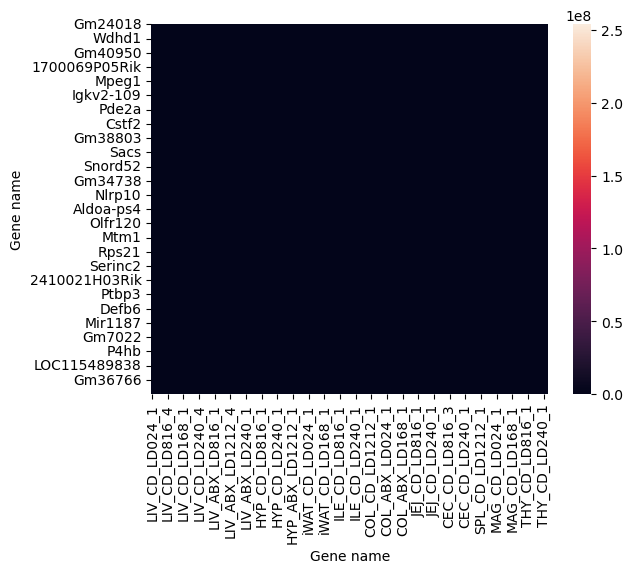

In [37]:
sns.heatmap(deseq2_norm(dds.to_df())[0].T);

### PCA

In [38]:
scaled_data = preprocessing.scale(deseq2_norm(dds.to_df())[0])
pca = PCA()

In [39]:
pca.fit(scaled_data);

In [40]:
pca_data = pca.transform(scaled_data)

In [41]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

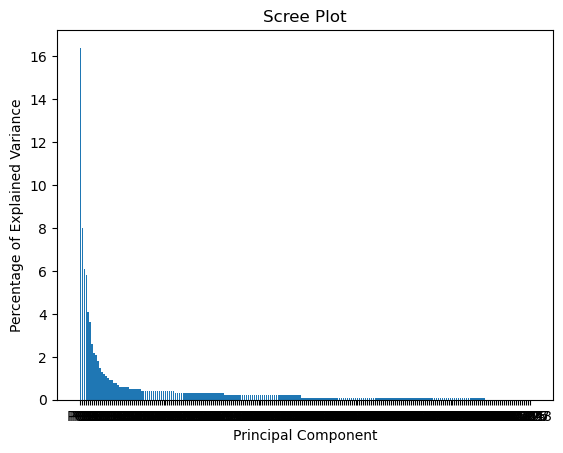

In [42]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [43]:
pca_df = pd.DataFrame(pca_data, index=metadata.index, columns=labels)

In [44]:
pca_df.index

Index(['LIV_CD_LD024_1', 'LIV_CD_LD024_2', 'LIV_CD_LD024_3', 'LIV_CD_LD024_4',
       'LIV_CD_LD024_5', 'LIV_CD_LD024_6', 'LIV_CD_LD816_1', 'LIV_CD_LD816_2',
       'LIV_CD_LD816_3', 'LIV_CD_LD816_4',
       ...
       'THY_CD_LD816_3', 'THY_CD_LD1212_1', 'THY_CD_LD1212_2',
       'THY_CD_LD1212_3', 'THY_CD_LD168_1', 'THY_CD_LD168_2', 'THY_CD_LD168_3',
       'THY_CD_LD240_1', 'THY_CD_LD240_2', 'THY_CD_LD240_3'],
      dtype='object', name='Gene name', length=228)

In [45]:
lut = dict(zip(set(metadata['Tissue']),[i.lower() for i in ['#FF0000','#FF1493','#FFD700','#663399','#32CD32','#556B2F','#4682B4','#2F4F4F','#808000','#fffc63']]))

In [46]:
colors = metadata['Tissue'].map(lut)

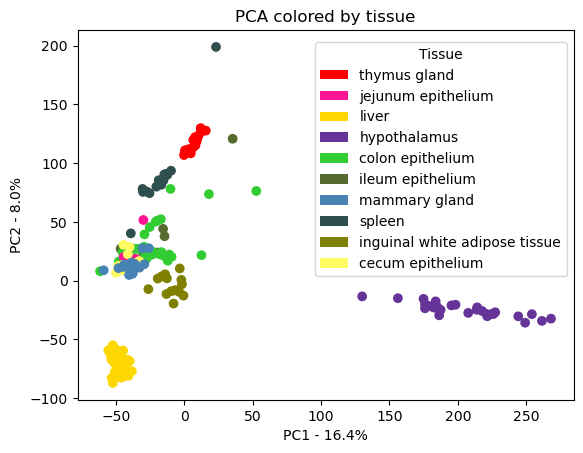

In [47]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(pca_df.PC1, pca_df.PC2, c=list(colors))
plt.title('PCA colored by tissue')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Tissue',
           bbox_to_anchor=(0.9, 0.87), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.show()

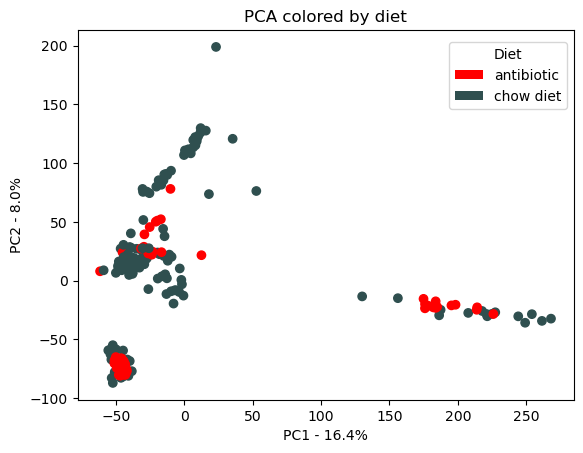

In [48]:
lut = dict(zip(set(metadata['Diet']),[i.lower() for i in ['#FF0000','#2F4F4F']]))
colors = metadata['Diet'].map(lut)

plt.scatter(pca_df.PC1, pca_df.PC2, c=list(colors))
plt.title('PCA colored by diet')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Diet',
           bbox_to_anchor=(0.9, 0.87), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.show()

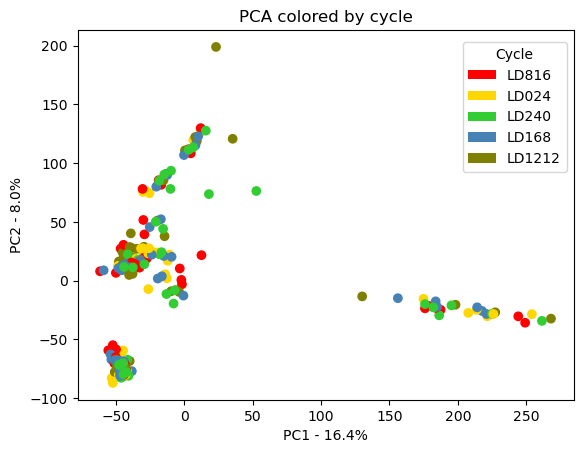

In [49]:
lut = dict(zip(set(metadata['Cycle']),['#FF0000','#FFD700','#32CD32','#4682B4','#808000']))
colors = metadata['Cycle'].map(lut)

plt.scatter(pca_df.PC1, pca_df.PC2, c=list(colors))
plt.title('PCA colored by cycle')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Cycle',
           bbox_to_anchor=(0.9, 0.87), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.show()

### Expression profile

In [50]:
genes = list(deseq2_norm(dds.to_df())[0])

In [51]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

Gabbr1      0.012003
Clcn6       0.011978
Klhl11      0.011977
Gdi1        0.011974
Clasp2      0.011971
Map3k12     0.011968
Meaf6       0.011952
Dnajc18     0.011939
Vamp2       0.011931
Slc25a27    0.011924
dtype: float64


In [52]:
top_10_genes

array(['Gabbr1', 'Clcn6', 'Klhl11', 'Gdi1', 'Clasp2', 'Map3k12', 'Meaf6',
       'Dnajc18', 'Vamp2', 'Slc25a27'], dtype=object)

In [53]:
top10 = deseq2_norm(dds.to_df())[0][top_10_genes]

In [54]:
mpl.rc_file_defaults()

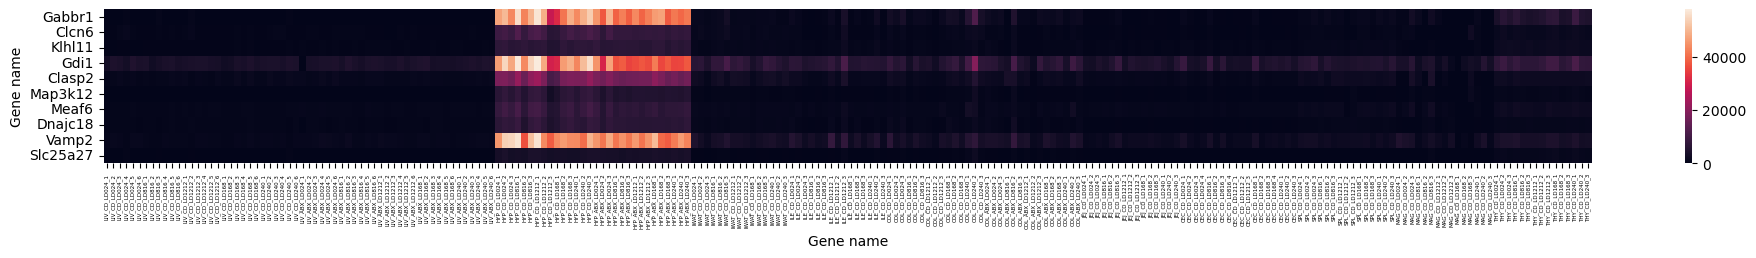

In [55]:
plt.rc('xtick', labelsize=4)
plt.figure(figsize=(24,2))
sns.heatmap(top10.T);

In [56]:
lut = dict(zip(set(metadata['Tissue']),['#FF0000','#FF1493','#FFD700','#663399','#32CD32','#556B2F','#4682B4','#2F4F4F','#808000','#fffc63']))
colors = metadata['Tissue'].map(lut)

AttributeError: 'ClusterGrid' object has no attribute 'set_axis_labels'

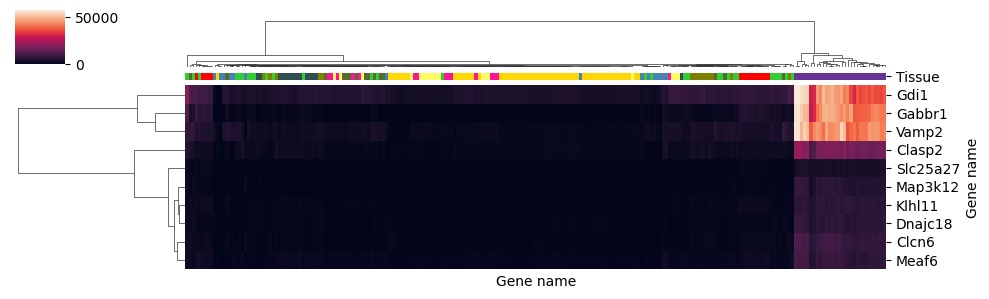

In [57]:
fg = sns.clustermap(top10.T,
               figsize=(10,3),
               col_colors=colors,
               xticklabels=False
              );
fg.set_axis_labels(['my x label', 'my y label'])